___
<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg" width="350px" height="180px" />

# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> `ANA ROSAURA ZAMARRÓN ÁLVAREZ` </Strong>
- <Strong> Año </Strong>: 2021
- <Strong> Email: </Strong>  <font color="blue"> `ana.zamarron@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: http://www.lintao-dashboards.com/wp-content/uploads/2016/02/ldm930.jpg.</p>

## Clasificación - Heart failure prediction

El propósito de este proyecto es predecir si un paciente nuevo tendrá una enfermedad del corazón o no, la predicción se hace con base en un dataset que contiene información sobre diferentes estudios tomados a otros pacientes anteriormente.

#### Attribute Information
+ Age: age of the patient [years]
+ Sex: sex of the patient [M: Male, F: Female]
+ ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
+ RestingBP: resting blood pressure [mm Hg]
+ Cholesterol: serum cholesterol [mm/dl]
+ FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
+ RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
+ MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
+ ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
+ Oldpeak: oldpeak = ST [Numeric value measured in depression]
+ ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

Variable de respuesta:
+ HeartDisease: output class [1: heart disease, 0: Normal]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

Tenemos 918 filas y 11 variables independientes y una variable de respuesta.

#### Exploración de datos

In [5]:
#Visualizar todo junto
def reporte(datos):
    dtyp = pd.DataFrame(datos.dtypes, columns=['Tipo'])
    missing = pd.DataFrame(datos.isnull().sum(), columns=['Valores_Nulos'])
    unival = pd.DataFrame(data.nunique(), columns=['Valores_Unicos'])
    maximo = pd.DataFrame(data.max(), columns=['Max'])
    minimo = pd.DataFrame(data.min(), columns=['Min'])
    return dtyp.join(missing).join(unival).join(maximo).join(minimo)
reporte(data)

,Tipo,Valores_Nulos,Valores_Unicos,Max,Min
Age,int64,0,50,77,28
Sex,object,0,2,M,F
ChestPainType,object,0,4,TA,ASY
RestingBP,int64,0,67,200,0
Cholesterol,int64,0,222,603,0
FastingBS,int64,0,2,1,0
RestingECG,object,0,3,ST,LVH
MaxHR,int64,0,119,202,60
ExerciseAngina,object,0,2,Y,N
Oldpeak,float64,0,53,6.2,-2.6


+ Ninguna variable tiene datos nulos.
+ Tenemos 7 variables numéricas y 5 categóricas.
+ Las edades de los pacientes van de 28 a 77 años.

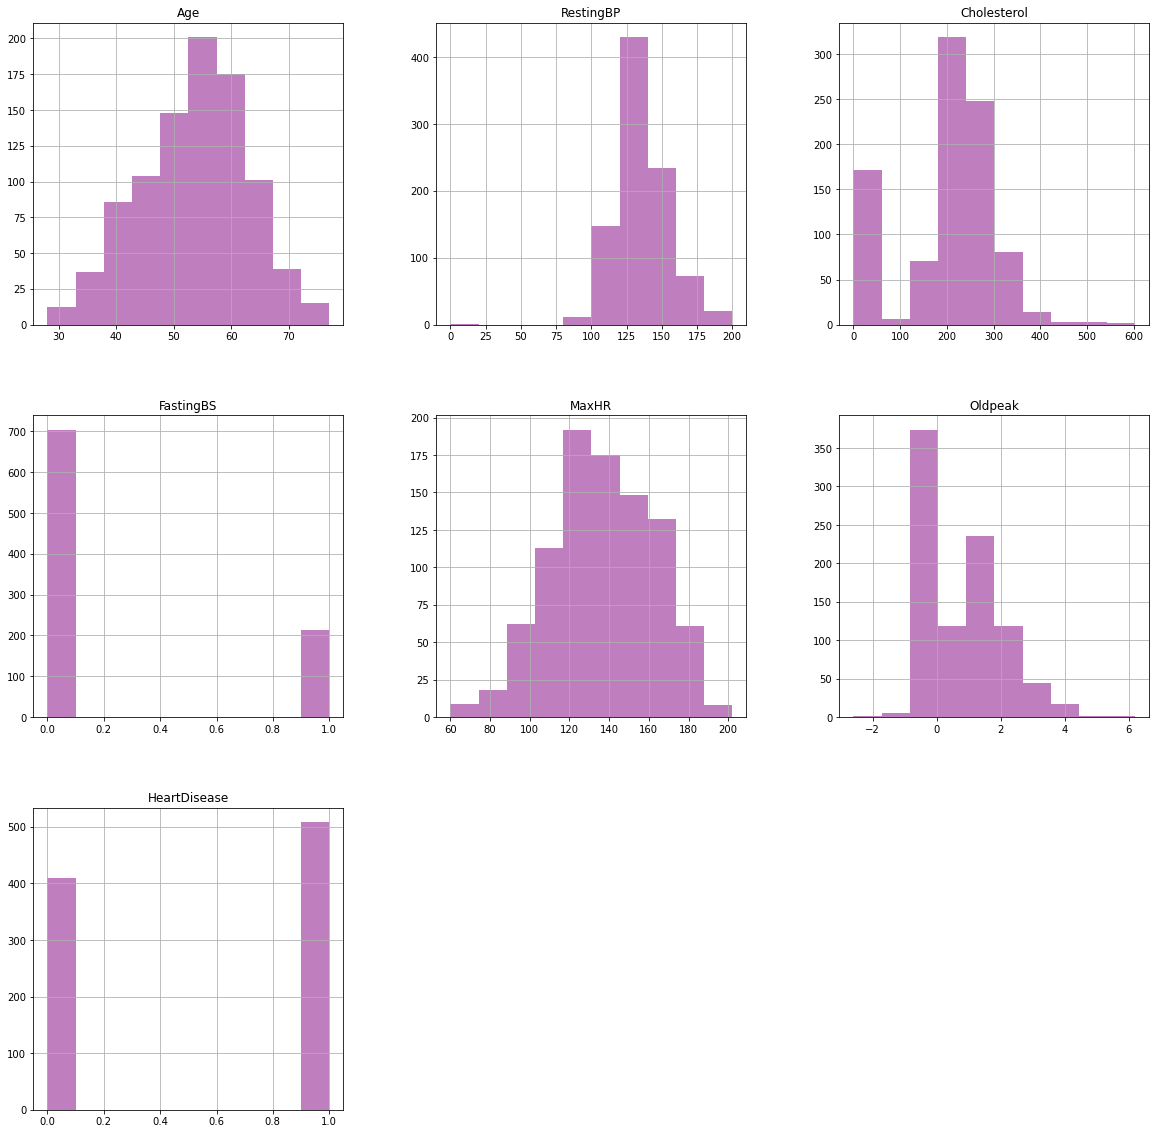

In [6]:
data.hist(color='purple', alpha=0.5, bins=10,figsize =(20,20))
plt.show()

In [7]:
data['Age'].skew()

-0.19593302867569365

In [8]:
data['RestingBP'].skew()

0.1798393100516288

In [9]:
data['Cholesterol'].skew()

-0.6100864307268192

In [10]:
data['FastingBS'].skew()

1.2644841750727027

In [11]:
data['MaxHR'].skew()

-0.14435941846180994

In [12]:
data['Oldpeak'].skew()

1.0228720218107528

In [13]:
data['HeartDisease'].skew()

-0.21508633825088655

+ Las variables `HeartDisease` y `FastingsBS` son binarias.
+ El resto de las variables tienen una distribución más o menos normal.
+ Las edades más freceuntes son entre 50 y 60 años. Esta variable tiene un sesgo negativo.
+ El resting blood pressure más frecuente es alrededor de 125 mm Hg. Esta variable tiene un sesgo positivo.
+ Los niveles de colesterol más frecuentes son entre 200 y 300 mm/dl. Esta variable tiene un sesgo negativo.
+ En FastingBS la mayoría de las personas tienen 120 mg/dl de fasting blood sugar. Esta variable tiene un sesgo positivo.
+ En MaxHR la mayoría de las personas tienen entre 120 y 160 de maximum heart rate achieved. Esta variable tiene un sesgo negativo.
+ En Oldpeak la mayoría de las personas están en el rango entre -1 y 2. Esta variable tiene un sesgo positivo.
+ Hay un poco más de personas que sí tienen una enfermedad del corazón que las que no. Heart disease tiene un sesgo negativo.

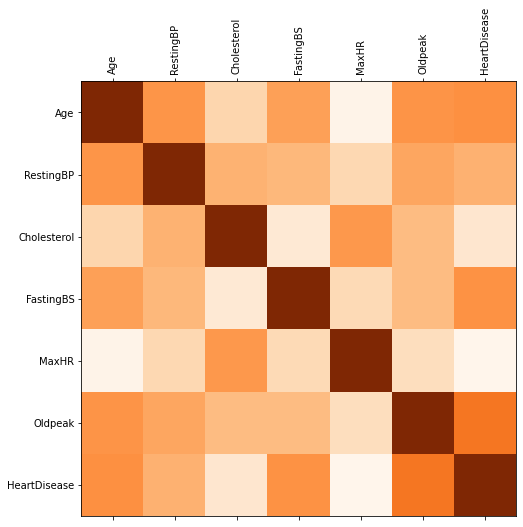

In [14]:
corr = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']].select_dtypes(exclude=['object']).corr()

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(corr, cmap='Oranges')

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

#plt.suptitle('Correlation heatmap\n', fontsize=20)

ax.grid(False)

Podemos ver que las variables que tienen mayor correlación con la varible de respuesta `HeartDisease` son `OldPeak`, `FastingBS` y `Age`. Son las variables que pensamos que nos pueden ayudar más a predecir.

Text(0, 0.5, 'Proporcion de HeartDisease')

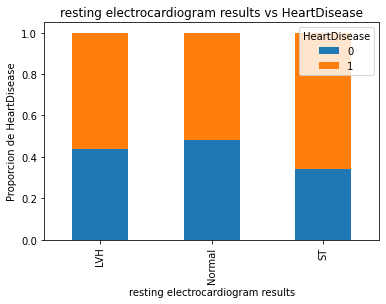

In [15]:
#Analizar variable Y vs resting electrocardiogram results
table = pd.crosstab(data.RestingECG,data.HeartDisease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('resting electrocardiogram results vs HeartDisease')
plt.xlabel('resting electrocardiogram results')
plt.ylabel('Proporcion de HeartDisease')

Parece que esta variable no nos va a ayudar mucho a predecir, ya que las propociones son muy parecidas en las 3 categorías.

Text(0, 0.5, 'Proporcion de HeartDisease')

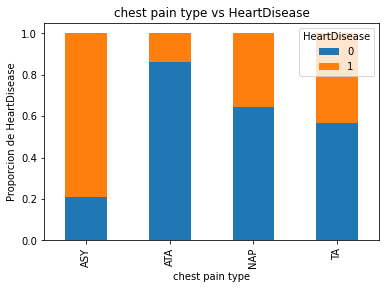

In [16]:
#Analizar variable Y vs chest pain type
table = pd.crosstab(data.ChestPainType,data.HeartDisease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('chest pain type vs HeartDisease')
plt.xlabel('chest pain type')
plt.ylabel('Proporcion de HeartDisease')

Parece que esta variable sí nos va a ayudar más a predecir, porque las proporciones de la variable de respuesta varían en cada categoría.

Text(0, 0.5, 'Proporcion de HeartDisease')

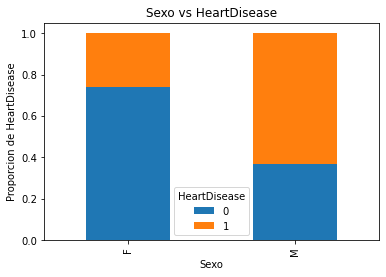

In [17]:
#Analizar variable Y vs sexo
table = pd.crosstab(data.Sex,data.HeartDisease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sexo vs HeartDisease')
plt.xlabel('Sexo')
plt.ylabel('Proporcion de HeartDisease')

Esta variable también parece que nos va a ayudar a hacer una mejor predicción porque los sexos tienen proporciones diferentes. 

Text(0, 0.5, 'Proporcion de HeartDisease')

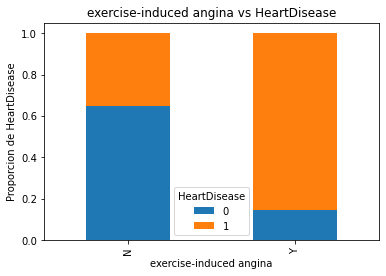

In [18]:
#Analizar variable Y vs exercise-induced angina
table = pd.crosstab(data.ExerciseAngina,data.HeartDisease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('exercise-induced angina vs HeartDisease')
plt.xlabel('exercise-induced angina')
plt.ylabel('Proporcion de HeartDisease')

Esta variable también parece que es buena para hacer una mejor predicción porque las categorías tienen proporciones diferentes.

Text(0, 0.5, 'Proporcion de HeartDisease')

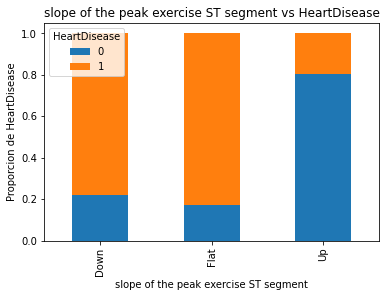

In [19]:
#Analizar variable Y vs slope of the peak exercise ST segment
table = pd.crosstab(data.ST_Slope,data.HeartDisease)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('slope of the peak exercise ST segment vs HeartDisease')
plt.xlabel('slope of the peak exercise ST segment')
plt.ylabel('Proporcion de HeartDisease')

Esta variable también parece que es buena para hacer una mejor predicción porque las categorías tienen proporciones diferentes, especialmente 'Up'.

<AxesSubplot:>

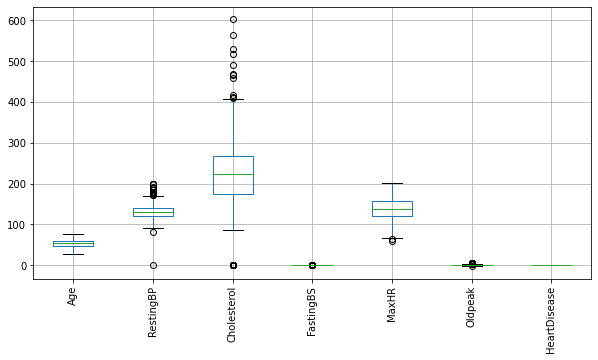

In [20]:
data.boxplot(figsize=(10,5), rot=90)

`Cholesterol` tiene varios datos atípicos muy alejados. `RestingBP` y `Oldpeak` también tienen datos atípicos pero no están tan alejados.

#### Separemos los el dataset en datos de entrenamiento y de prueba.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [23]:
categorical_df = data.select_dtypes(include = 'object')
categorical_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


Utilizamos One-Hot para convertir variables categóricas a numéricas.

In [24]:
dummies = pd.get_dummies(categorical_df)
dummies

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [25]:
df = data.copy()
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [26]:
df.drop(columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], inplace = True)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


Unimos las variables numéricas con los dummies.

In [27]:
df = df.join(dummies)

In [28]:
df.drop('HeartDisease',axis = 1,inplace = True)

In [29]:
df['y'] = data['HeartDisease']

In [30]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,y
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


+ Ahora tenemos nuestro dataframe con las variables numéricas y las variables encodeadas con One-Hot.
+ Tenemos un dataframe de 21 columnas

In [31]:
df.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
Sex_F                  uint8
Sex_M                  uint8
ChestPainType_ASY      uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_LVH         uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_N       uint8
ExerciseAngina_Y       uint8
ST_Slope_Down          uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
y                      int64
dtype: object

Ya no tenemos varibales de tipo object.

In [32]:
df.iloc[:,0:20].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [33]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,y
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,...,1,0,1,0,1,0,0,1,0,1
914,68,144,193,1,141,3.4,0,1,1,0,...,0,0,1,0,1,0,0,1,0,1
915,57,130,131,0,115,1.2,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
916,57,130,236,0,174,0.0,1,0,0,1,...,0,1,0,0,1,0,0,1,0,1


#### train/test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
                                df.drop(columns = ['y']), df['y'], 
                                test_size = 0.2, random_state=42) 

In [35]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,120,240,1,194,0.8,0,1,0,0,1,0,0,1,0,1,0,1,0,0
25,36,130,209,0,178,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
84,56,150,213,1,125,1.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
10,37,130,211,0,142,0.0,1,0,0,0,1,0,0,1,0,1,0,0,0,1
344,51,120,0,1,104,0.0,0,1,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,48,120,254,0,110,0.0,1,0,1,0,0,0,0,0,1,1,0,0,0,1
270,45,120,225,0,140,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
860,60,130,253,0,144,1.4,0,1,1,0,0,0,0,1,0,0,1,0,0,1
435,60,152,0,0,118,0.0,0,1,1,0,0,0,0,0,1,0,1,0,0,1


#### Balanceo de la variable de respuesta 'HeartDisease'

Así se ve la variable de respuesta antes de balancear.

Text(0.5, 1.0, 'Cuenta de la variable de salida')

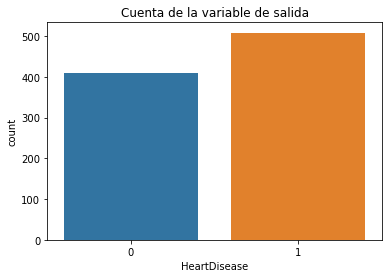

In [16]:
sns.countplot(x=data['HeartDisease']).set_title("Cuenta de la variable de salida")

Utilizamos SMOTE.

Text(0.5, 1.0, 'Cuenta de la variable de salida')

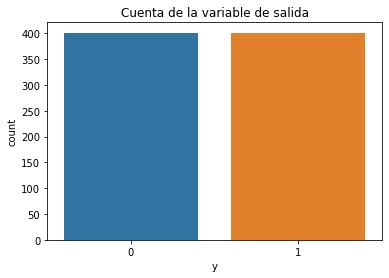

In [36]:
#Balancear datos de salida usando algoritmo de SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
sns.countplot(x=y_train_res).set_title("Cuenta de la variable de salida")

Ahora nuestra variable de respuesta está balanceada.

In [37]:
X_train_res

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,42,120,240,1,194,0.80000,0,1,0,0,1,0,0,1,0,1,0,1,0,0
1,36,130,209,0,178,0.00000,0,1,0,0,1,0,0,1,0,1,0,0,0,1
2,56,150,213,1,125,1.00000,0,1,1,0,0,0,0,1,0,0,1,0,1,0
3,37,130,211,0,142,0.00000,1,0,0,0,1,0,0,1,0,1,0,0,0,1
4,51,120,0,1,104,0.00000,0,1,1,0,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,48,120,182,0,136,0.47537,0,1,0,1,0,0,0,1,0,1,0,0,0,0
798,56,131,220,0,134,0.27469,0,1,1,0,0,0,0,0,0,1,0,0,0,0
799,54,149,321,0,147,0.00000,0,0,0,1,0,0,0,1,0,1,0,0,0,1
800,50,138,223,0,170,0.00000,0,1,0,0,0,0,0,1,0,1,0,0,0,1


#### Selección de variables

Compararemos la selección de variables de los modelos LASSO y el modelo basado en árboles.

#### Lasso

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [41]:
#modelo
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())])
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3)
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...............................model__alpha=0.1; total time=   0.8s
[CV 2/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=0.2; total time=   0.0s
[CV 1/5] END ...............model__alpha=0.30000000000000004; total time=   0.0s
[CV 2/5] END ...............model__alpha=0.3000

[CV 2/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.1; total time=   0.0s
[CV 1/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=2.2; total time=   0.0s
[CV 1/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 2/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 3/5] END ................model__alpha=2.3000000000000003; total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.2; total time=   0.0s
[CV 1/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 2/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 3/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 4/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 5/5] END ...............................model__alpha=4.3; total time=   0.0s
[CV 1/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 2/5] END ................model__alpha=4.3999999999999995; total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ...............................model__alpha=6.3; total time=   0.0s
[CV 2/5] END ...............................model__alpha=6.3; total time=   0.0s
[CV 3/5] END ...............................model__alpha=6.3; total time=   0.0s
[CV 4/5] END ...............................model__alpha=6.3; total time=   0.0s
[CV 5/5] END ...............................model__alpha=6.3; total time=   0.0s
[CV 1/5] END ...............................model__alpha=6.4; total time=   0.0s
[CV 2/5] END ...............................model__alpha=6.4; total time=   0.0s
[CV 3/5] END ...............................model__alpha=6.4; total time=   0.0s
[CV 4/5] END ...............................model__alpha=6.4; total time=   0.0s
[CV 5/5] END ...............................model__alpha=6.4; total time=   0.0s
[CV 1/5] END ...............................model__alpha=6.5; total time=   0.0s
[CV 2/5] END ...............................model__alpha=6.5; total time=   0.0s
[CV 3/5] END ...............

[CV 4/5] END ...............................model__alpha=8.3; total time=   0.0s
[CV 5/5] END ...............................model__alpha=8.3; total time=   0.0s
[CV 1/5] END ...............................model__alpha=8.4; total time=   0.0s
[CV 2/5] END ...............................model__alpha=8.4; total time=   0.0s
[CV 3/5] END ...............................model__alpha=8.4; total time=   0.0s
[CV 4/5] END ...............................model__alpha=8.4; total time=   0.0s
[CV 5/5] END ...............................model__alpha=8.4; total time=   0.0s
[CV 1/5] END ...............................model__alpha=8.5; total time=   0.0s
[CV 2/5] END ...............................model__alpha=8.5; total time=   0.0s
[CV 3/5] END ...............................model__alpha=8.5; total time=   0.0s
[CV 4/5] END ...............................model__alpha=8.5; total time=   0.0s
[CV 5/5] END ...............................model__alpha=8.5; total time=   0.0s
[CV 1/5] END ...............

In [42]:
#nuestras variables
features = X_train_res.columns
features

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Variables que sobrevivieron a Lasso:

In [43]:
np.array(features)[importance > 0]

array(['Sex_F', 'ChestPainType_ASY', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Up'], dtype=object)

Variables que Lasso no considera importante y eliminó:

In [44]:
np.array(features)[importance == 0]

array(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat'], dtype=object)

Lasso eliminó 15 variables:

+ `Age`
+ `RestingBP`
+ `Cholesterol`
+ `FastingBS`
+ `MaxHR`
+ `Oldpeak`
+ `Sex_M`
+ `ChestPainType_ATA`
+ `ChestPainType_NAP`
+ `ChestPainType_TA`
+ `RestingECG_LVH`
+ `RestingECG_Normal`
+ `RestingECG_ST`
+ `ST_Slope_Down`
+ `ST_Slope_Flat`

#### Árboles

In [45]:
### Feature Importance con clasificador de Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
# crear objeto de Extra Trees
model = ExtraTreesClassifier(n_estimators=10)
#Ajustar modelo a datos
model.fit(X_train_res, y_train_res)

importances = pd.DataFrame(data={
#'Attribute': new.iloc[:,0:20].columns,
'Attribute': X_train_res.columns,
'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
# En esa tabla podemos ver desde la variable más importante hasta la menos importante
importances

,Attribute,Importance
19,ST_Slope_Up,0.188756
8,ChestPainType_ASY,0.133818
18,ST_Slope_Flat,0.084485
16,ExerciseAngina_Y,0.077923
0,Age,0.067569
2,Cholesterol,0.062327
1,RestingBP,0.061017
5,Oldpeak,0.058723
4,MaxHR,0.056032
15,ExerciseAngina_N,0.039184


De acuerdo con el modelo basado en árboles, las varibles que menos nos sirven son:
+ `ChestPainType_TA`
+ `ST_Slope_Down`
+ `RestingECG_ST`
+ `ChestPainType_NAP`
+ `RestingECG_Normal`

Por lo tanto, yo eliminaría estas 5 variables porque ambos modelos las detectaron como irrelevantes:
+ `ChestPainType_TA`
+ `ST_Slope_Down`
+ `RestingECG_ST`
+ `ChestPainType_NAP`
+ `RestingECG_Normal`

No eliminaría las 15 variables que detectó LASSO porque son demasiadas.

#### Normalización

Normalizamos solamente las variables predictoras.

In [46]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [47]:
X_test

array([[ 1.02261978,  0.38586988, -0.05509534, ..., -0.25231028,
        -0.95607591,  1.15975396],
       [-0.05086329,  0.65742801,  2.95275017, ..., -0.25231028,
         1.04594205, -0.86225185],
       [ 1.2373164 ,  1.47210239, -1.8709773 , ..., -0.25231028,
         1.04594205, -0.86225185],
       ...,
       [ 1.12996809,  0.4401815 ,  0.40120321, ..., -0.25231028,
         1.04594205, -0.86225185],
       [-0.48025652, -0.15724638,  0.60607194, ..., -0.25231028,
        -0.95607591,  1.15975396],
       [ 1.12996809,  0.60311638, -1.8709773 , ..., -0.25231028,
         1.04594205, -0.86225185]])

In [48]:
X_train_res= pd.DataFrame(X_train_res, columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       ])
X_train_res

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.231695,-0.700363,0.363954,1.949973,2.263034,-0.067171,-0.524442,0.584069,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,3.963374,-0.956076,-0.862252
1,-1.875785,-0.157246,0.075276,-0.512828,1.630095,-0.822737,-0.524442,0.584069,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
2,0.271182,0.928986,0.112525,1.949973,-0.466517,0.121721,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,-1.214623,1.276522,-0.252310,1.045942,-0.862252
3,-1.768436,-0.157246,0.093900,-0.512828,0.205982,-0.822737,1.906787,-1.712125,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
4,-0.265560,-0.700363,-1.870977,1.949973,-1.297249,-0.822737,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,1.045942,-0.862252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-0.587605,-0.700363,-0.176154,-0.512828,-0.031371,-0.373770,-0.524442,0.584069,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,-0.862252
798,0.271182,-0.102935,0.177710,-0.512828,-0.110488,-0.563304,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,-1.192879,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,-0.862252
799,0.056485,0.874675,1.118244,-0.512828,0.403775,-0.822737,-0.524442,-1.712125,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
800,-0.372908,0.277247,0.205647,-0.512828,1.313625,-0.822737,-0.524442,0.584069,-1.015076,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754


A continuación, haremos los modelo de predicción.

Data set recuperado de: https://www.kaggle.com/fedesoriano/heart-failure-prediction

## SEGUNDA PARTE DEL PROYECTO: MODELOS

### XG Boost

In [49]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [50]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

In [51]:
#Construir el xgboost
#inicializar objeto de clasificación
modelo = xgb.XGBClassifier(objective='binary:logistic', missing=1, seed=42)
#Entrenar modelo
modelo.fit(X_train_res, y_train_res, verbose=True, # va a impimir cada paso que hace
          early_stopping_rounds=10, #parar de construir más árboles si no mejora la situación de los residuales
          eval_metric='aucpr',
          eval_set=[(X_train_res, y_train_res)])

[0]	validation_0-aucpr:0.93828
[1]	validation_0-aucpr:0.97406
[2]	validation_0-aucpr:0.97363
[3]	validation_0-aucpr:0.98098
[4]	validation_0-aucpr:0.98473
[5]	validation_0-aucpr:0.98788
[6]	validation_0-aucpr:0.98878
[7]	validation_0-aucpr:0.99054
[8]	validation_0-aucpr:0.99237
[9]	validation_0-aucpr:0.99390
[10]	validation_0-aucpr:0.99487
[11]	validation_0-aucpr:0.99619
[12]	validation_0-aucpr:0.99677
[13]	validation_0-aucpr:0.99718
[14]	validation_0-aucpr:0.99774
[15]	validation_0-aucpr:0.99826
[16]	validation_0-aucpr:0.99834
[17]	validation_0-aucpr:0.99868
[18]	validation_0-aucpr:0.99904
[19]	validation_0-aucpr:0.99936
[20]	validation_0-aucpr:0.99938
[21]	validation_0-aucpr:0.99955
[22]	validation_0-aucpr:0.99964


/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-aucpr:0.99974
[24]	validation_0-aucpr:0.99981
[25]	validation_0-aucpr:0.99983
[26]	validation_0-aucpr:0.99987
[27]	validation_0-aucpr:0.99989
[28]	validation_0-aucpr:0.99993
[29]	validation_0-aucpr:0.99996
[30]	validation_0-aucpr:0.99997
[31]	validation_0-aucpr:0.99998
[32]	validation_0-aucpr:0.99998
[33]	validation_0-aucpr:0.99999
[34]	validation_0-aucpr:1.00000
[35]	validation_0-aucpr:1.00000
[36]	validation_0-aucpr:1.00000
[37]	validation_0-aucpr:1.00000
[38]	validation_0-aucpr:1.00000
[39]	validation_0-aucpr:1.00000
[40]	validation_0-aucpr:1.00000
[41]	validation_0-aucpr:1.00000
[42]	validation_0-aucpr:1.00000
[43]	validation_0-aucpr:1.00000


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=1, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [52]:
X_train_res

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.231695,-0.700363,0.363954,1.949973,2.263034,-0.067171,-0.524442,0.584069,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,3.963374,-0.956076,-0.862252
1,-1.875785,-0.157246,0.075276,-0.512828,1.630095,-0.822737,-0.524442,0.584069,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
2,0.271182,0.928986,0.112525,1.949973,-0.466517,0.121721,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,-1.214623,1.276522,-0.252310,1.045942,-0.862252
3,-1.768436,-0.157246,0.093900,-0.512828,0.205982,-0.822737,1.906787,-1.712125,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
4,-0.265560,-0.700363,-1.870977,1.949973,-1.297249,-0.822737,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,1.045942,-0.862252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-0.587605,-0.700363,-0.176154,-0.512828,-0.031371,-0.373770,-0.524442,0.584069,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,-0.862252
798,0.271182,-0.102935,0.177710,-0.512828,-0.110488,-0.563304,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,-1.192879,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,-0.862252
799,0.056485,0.874675,1.118244,-0.512828,0.403775,-0.822737,-0.524442,-1.712125,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754
800,-0.372908,0.277247,0.205647,-0.512828,1.313625,-0.822737,-0.524442,0.584069,-1.015076,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.252310,-0.956076,1.159754


In [53]:
X_test= pd.DataFrame(X_test, columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       ])
X_test

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1.022620,0.385870,-0.055095,-0.512828,1.669654,-0.822737,1.906787,-1.712125,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.25231,-0.956076,1.159754
1,-0.050863,0.657428,2.952750,-0.512828,-0.268723,-0.822737,-0.524442,0.584069,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.25231,1.045942,-0.862252
2,1.237316,1.472102,-1.870977,1.949973,-0.585193,0.310613,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,-1.192879,2.146716,0.823301,-0.783379,-0.25231,1.045942,-0.862252
3,0.271182,-0.157246,-1.870977,-0.512828,-0.585193,0.121721,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,2.076357,-1.192879,-0.465828,-1.214623,1.276522,-0.25231,1.045942,-0.862252
4,0.056485,-1.352102,1.006497,-0.512828,0.759803,-0.822737,-0.524442,0.584069,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.25231,-0.956076,1.159754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,-0.372908,0.385870,0.810941,-0.512828,0.126864,-0.822737,1.906787,-1.712125,-1.015076,-0.473738,1.972370,-0.207154,-0.481613,0.838308,-0.465828,-1.214623,1.276522,-0.25231,1.045942,-0.862252
180,1.022620,-1.352102,0.634009,-0.512828,1.274067,0.877287,1.906787,-1.712125,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,-1.214623,1.276522,-0.25231,1.045942,-0.862252
181,1.129968,0.440182,0.401203,1.949973,-0.822545,0.593950,-0.524442,0.584069,0.985148,-0.473738,-0.507004,-0.207154,-0.481613,-1.192879,2.146716,-1.214623,1.276522,-0.25231,1.045942,-0.862252
182,-0.480257,-0.157246,0.606072,-0.512828,1.353184,-0.256062,-0.524442,0.584069,-1.015076,2.110872,-0.507004,-0.207154,-0.481613,0.838308,-0.465828,0.823301,-0.783379,-0.25231,-0.956076,1.159754


In [54]:
X_test.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

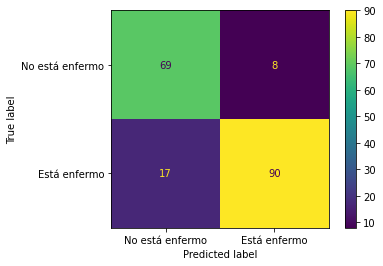

In [55]:
plot_confusion_matrix(modelo, X_test, y_test, values_format='d', display_labels=["No está enfermo","Está enfermo"])

Matriz de confusión:
+ True positives: 69
+ True negatives: 90
+ False positives: 8
+ False negatives: 17

In [56]:
#Evaluacion del modelo
yhat_xgb = modelo.predict(X_test)
accu_xgb = accuracy_score(y_test,yhat_xgb)
prec_xgb = precision_score(y_test,yhat_xgb,average='weighted')
reca_xgb = recall_score(y_test,yhat_xgb,average='weighted')
f1_xgb = f1_score(y_test,yhat_xgb, average='weighted')
print('Accuracy|Precision|Recall|F1 Score\n %0.3f\t %0.3f\t %0.3f\t %0.3f'%(accu_xgb,prec_xgb,reca_xgb,f1_xgb))

Accuracy|Precision|Recall|F1 Score
 0.864	 0.870	 0.864	 0.865


#### Optimizando hiperparámetros 

In [57]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [58]:
param_grid={
    'max_depth':[5,8,10],
    'learning_rate':[0.5,0.1,0.01],
    'gamma':[1,4,8],
    'reg_lambda':[0,1,10],
    'scale_pos_weight':[1,3,5]
}

optimal_params = GridSearchCV(
                            estimator=xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                            subsample=0.9,
                            colsample_bytree=0.5),
                            param_grid=param_grid,
                            scoring='accuracy',
                            verbose=0,
                            n_jobs=10,
                            cv=3)

#optimal_params.fit(X_train_res, y_train_res,
#                  early_stopping_rounds=10,
#                  eval_metric='aucpr',
#                  eval_set=[(X_test, y_test)],
#                  verbose=False)

optimal_params.fit(X_train_res, y_train_res)
optimal_params.best_params_

/Users/rosaura/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'gamma': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

In [59]:
#Construir y evaluar el XGBoost con los hiperparámetros óptimos
modelo_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            seed=42,
                           gamma=1,
                           learning_rate=0.1,
                           max_depth=10,
                           reg_lambda=1,
                           scale_pos_weight=1,
                            subsample=0.9,
                            colsample_bytree=0.5)

modelo_xgb.fit(X_train_res, y_train_res)

[21:17:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

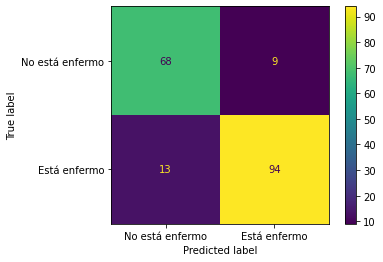

In [60]:
#ver cómo funciona el modelo entrenado con los datos de prueba
plot_confusion_matrix(modelo_xgb, X_test, y_test, values_format='d', display_labels=["No está enfermo","Está enfermo"])

In [61]:
#Evaluacion del modelo
yhat_xgb = modelo_xgb.predict(X_test)
accu_xgb = accuracy_score(y_test,yhat_xgb)
prec_xgb = precision_score(y_test,yhat_xgb,average='weighted')
reca_xgb = recall_score(y_test,yhat_xgb,average='weighted')
f1_xgb = f1_score(y_test,yhat_xgb, average='weighted')
print('Accuracy|Precision|Recall|F1 Score\n %0.4f\t %0.4f\t %0.4f\t %0.4f'%(accu_xgb,prec_xgb,reca_xgb,f1_xgb))

Accuracy|Precision|Recall|F1 Score
 0.8804	 0.8820	 0.8804	 0.8808


+ El accuracy mejoró, pasó de ser 0.864 a ser 0.8804.
+ El precision también mejoró, pasó de ser 0.87 a ser 0.882.
+ El recall también mejoró, pasó de ser 0.864 a ser 0.8804.
+ El F1 score también mejoró, pasó de ser 0.865 a ser 0.881.

Este modelo con los parámetros optimizados es mejor, sus métricas de evauación son mejores.

### Regresión Logística

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
#Inicializar objeto
logreg = LogisticRegression()
#Ajustar modelo a datos de entrenamiento
logreg.fit(X_train_res, y_train_res)
#Predecir con datos del test
y_pred_logreg = logreg.predict(X_test)
# Evaluacion del modelo
accu_log = accuracy_score(y_test,y_pred_logreg)
prec_log = precision_score(y_test,y_pred_logreg,average='weighted')
reca_log = recall_score(y_test,y_pred_logreg,average='weighted')
print('Accuracy|Precision|Recall|F1 Score\n %0.3f\t %0.3f\t %0.3f\t %0.3f'%(accu_log,prec_log,reca_log,reca_log))

Accuracy|Precision|Recall|F1 Score
 0.853	 0.857	 0.853	 0.853


#### Optimizamos hiperparámetros

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [65]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

In [66]:
#Inicializar modelo
log_model=LogisticRegression(max_iter=10000)
log_acc = cross_val_score(log_model, X_train_res, y_train_res, scoring='accuracy', cv=kfold)
log_prec = cross_val_score(log_model, X_train_res, y_train_res, scoring='precision', cv=kfold)
log_rec = cross_val_score(log_model, X_train_res, y_train_res, scoring='recall', cv=kfold)
log_f1 = cross_val_score(log_model, X_train_res, y_train_res, scoring='f1', cv=kfold)
# Performance
print('Accuracy: %.3f' % (np.mean(log_acc)))
print('Precision: %.3f' % (np.mean(log_prec)))
print('Recall: %.3f' % (np.mean(log_rec)))
print('Recall: %.3f' % (np.mean(log_f1)))

Accuracy: 0.875
Precision: 0.864
Recall: 0.891
Recall: 0.877


+ El accuracy mejoró, pasó de ser 0.853 a ser 0.875.
+ El precision también mejoró, pasó de ser 0.857 a ser 0.864.
+ El recall también mejoró, pasó de ser 0.853 a ser 0.891.
+ El F1 score también mejoró, pasó de ser 0.853 a ser 0.877.

Ahora comparamos ambos modelos con el que obutuvo mejores resultados de cada uno.

In [67]:
data_compar_cross = {'Modelo': ['LR','XGBoost'], 'Accuracy': [np.mean(log_acc),accu_xgb], 'Precision': [np.mean(log_prec),prec_xgb], 'Recall': [np.mean(log_rec),reca_xgb], 'F1 Score': [np.mean(log_f1),f1_xgb]}
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,Accuracy,Precision,Recall,F1 Score
0,LR,0.875295,0.864127,0.891042,0.877216
1,XGBoost,0.880435,0.882024,0.880435,0.880810


### Conclusiones
+ El Accuracy, Precision, y F1 Score fueron mejores en el modelo del XGBoost, pero el Recall fue mejor en el modelo de Logistic Regression.
+ En este caso, como balanceamos la variable de respuesta, nos conviene enfocarnos más en el recall. Además, como es muy importante saber la probabilidad de que alguien tenga una enfermedad del corazón, elegimos el recall, ya que es una situación de vida o muerte. Tomando esto en cuenta, elegiría el modelo de Logistic Regression.
+ El grid search del XG Boost tomó mucho tiempo en encontrar los parámetros óptimos, también por esto convience usar el modelo de logistic regression.
+ El modelo XGBoost tiene más parámetros que necesita optimizar, por eso le toma más tiempo en hacer la optimización de parámetros utilizando el Grid Search. Esta es otra razón por la que hacer el modelo Logistic Regression es más práctico.
+ Es difícil elegir uno de estos dos modelos, ya que sus métricas de evaluación son muy parecidas. La ventaja del Logistic Regression es que tiene un mejor recall, mientras que las otras 3 métricas del modelo XGBoost son mejores. Sin embargo, una desventaja del XGBoost es que le toma más tiempo a la computadora optimizar los hiperparámetros.